# Graduate Rational Internship Programme - The Sparks Foundation

> Name: Boda Manoj Kumar

> Batch: GRIPFEB21

> Task-1: Prediction using Supervised ML (simple linear regression with two variables "Hours" and "Scores")

> Dataset: http://bit.ly/w-data










### Importing Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset:

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Checking for null values:

In [3]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64



*   As we can see there are no null values



### Viewing the statistical information of the data

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Finding out the correlation between the Hours and Scores

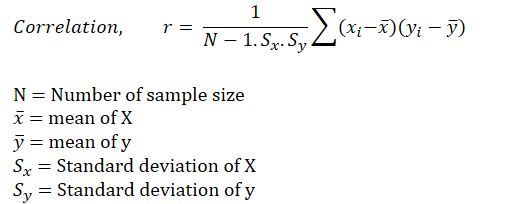

Now based of above correlation formula I have created a function named correlation, in this function if we pass any two columns(in this case "Hours" and "Scores") it will give us the correlation between them

In [5]:
def correlation(X, y):
      X_mean = X.mean()
      y_mean = y.mean()
      X_std = X.std()
      y_std = y.std()
      N = len(X)
      X_Xi = []
      y_yi = []
      for i, j in list(zip(list(X), list(y))):
        X_Xi.append(i-X_mean)
        y_yi.append(j-y_mean)
      sum = 0
      for i, j in zip(X_Xi, y_yi):
        sum = sum + i*j

      r = (1/((N-1)*X_std*y_std))*sum
      print("Correlation:", r)

In [6]:
# Calling the correlation function and passing Hours and Scores columns
correlation(df["Hours"], df["Scores"])

Correlation: 0.976190656022089




*   As we can see correlation is very very close to +1. That means Hours and Scores are in nearly a perfect positive correlation


*   So, we can apply linear regression on the data







Lets Visualize the scatter plot between Hours and Scores

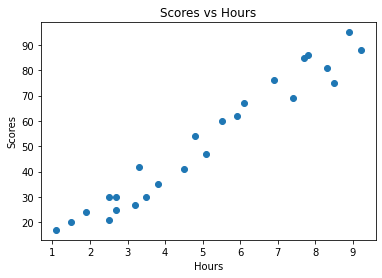

In [7]:
plt.scatter(df.Hours, df.Scores)
plt.title("Scores vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()



*   As the correlation is 0.97 the points in scatter plot are very close to each other and we can clearly see Scores are linearly dependent on Hours.


### Splitting the Data:

In [8]:
X = df.drop(columns = "Scores")   # Indepandent variable or Feature variable
y = df.Scores    # Dependent variable or Target varable

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 42)

In [10]:
print(X_train.head())

    Hours
9     2.7
13    3.3
1     5.1
22    3.8
5     1.5


In [11]:
print(y_train.head())

9     25
13    42
1     47
22    35
5     20
Name: Scores, dtype: int64


### Initializing the Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

### Training the Linear Regression Model

In [13]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
slope = lr_model.coef_[0]
print(slope)

9.682078154455697


In [15]:
x_intercept = lr_model.intercept_
print(x_intercept)

2.826892353899737


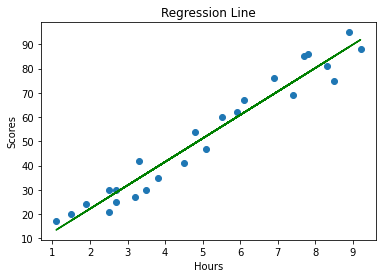

In [16]:
line = (slope * X) + x_intercept # (y = mx + c) m = slope, c = x-intercept
plt.title("Regression Line")
plt.scatter(X, y)
plt.plot(X, line, c = "g")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Making predictions with testing data

In [17]:
y_test_pred = lr_model.predict(X_test)
print(y_test_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


*   lets compare predicted(y_test_pred) values with actual(y_test) values




In [18]:
X_test["Actual Scores"] = y_test
X_test["Predicted Scores"] = y_test_pred

<ipython-input-18-7ed21ada4708>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Actual Scores"] = y_test
<ipython-input-18-7ed21ada4708>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Predicted Scores"] = y_test_pred


In [19]:
X_test

,Hours,Actual Scores,Predicted Scores
8,8.3,81,83.188141
16,2.5,30,27.032088
0,2.5,21,27.032088
23,6.9,76,69.633232
11,5.9,62,59.951153


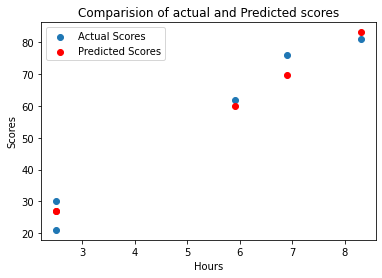

In [20]:
plt.scatter(X_test["Hours"], X_test["Actual Scores"])
plt.scatter(X_test["Hours"], X_test["Predicted Scores"], c = "r")
plt.title("Comparision of actual and Predicted scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend(["Actual Scores", "Predicted Scores"])
plt.show()

As we can see actual and predicted scores are very close to each other for a given Hours. But we need to find how much there is difference between Actual and Predicted scores. So we need a metric to determine performance of the model.

### Performance of the model:

*  Here I am going to use Mean Absolute Error. It gives us, on an average how much there is difference between actual and predicted Scores

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

In [22]:
mean_absolute_error(y_test, y_test_pred)

3.9207511902099244

* so we can see mean absolute error as 3.92 which means, on an average there is 3.92 difference between actual and predicted Scores.

In [23]:
r2_score(y_test, y_test_pred)

0.9678055545167994

* r2_score value is 0.967 and ideal r2_score is 1.
* 0.967 is very close to 1 so we can say that model is performing good.

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:
lr_model.predict([[9.25]])

array([92.38611528])

* So if a student studies for 9.25 hrs/day then he can score 92.38 marks approximately